temp_0.vl.json
__temp__/temp_0.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL4', 'type': 'nominal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_1.vl.json
__temp__/temp_1.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL4', 'type': 'nominal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_10.vl.json
__temp__/temp_10.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_100.vl.json
__temp__/temp_100.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_101.vl.json
__temp__/temp_101.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_102.vl.json
__temp__/temp_102.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_103.vl.json
__temp__/temp_103.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_104.vl.json
__temp__/temp_104.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_105.vl.json
__temp__/temp_105.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_106.vl.json
__temp__/temp_106.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'point'}


temp_107.vl.json
__temp__/temp_107.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_108.vl.json
__temp__/temp_108.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'ordinal'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_109.vl.json
__temp__/temp_109.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_11.vl.json
__temp__/temp_11.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_110.vl.json
__temp__/temp_110.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_111.vl.json
__temp__/temp_111.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_112.vl.json
__temp__/temp_112.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


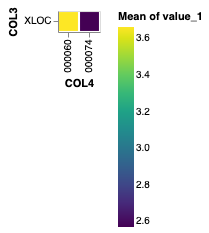

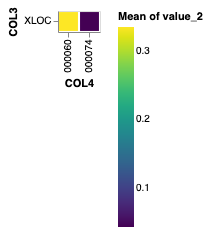

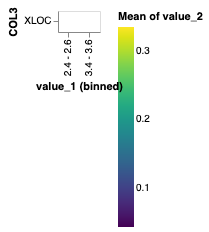

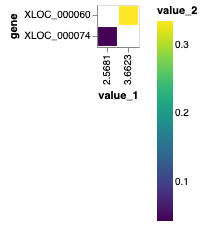

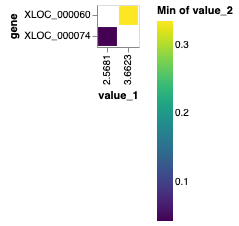

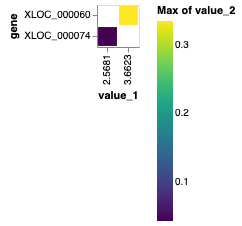

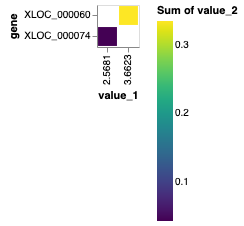

temp_113.vl.json
__temp__/temp_113.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_114.vl.json
__temp__/temp_114.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_115.vl.json
__temp__/temp_115.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_116.vl.json
__temp__/temp_116.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'point'}


temp_117.vl.json
__temp__/temp_117.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_118.vl.json
__temp__/temp_118.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_119.vl.json
__temp__/temp_119.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_12.vl.json
__temp__/temp_12.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'point'}


temp_120.vl.json
__temp__/temp_120.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_121.vl.json
__temp__/temp_121.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_122.vl.json
__temp__/temp_122.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_123.vl.json
__temp__/temp_123.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_124.vl.json
__temp__/temp_124.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_125.vl.json
__temp__/temp_125.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_126.vl.json
__temp__/temp_126.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'point'}


temp_127.vl.json
__temp__/temp_127.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_128.vl.json
__temp__/temp_128.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_129.vl.json
__temp__/temp_129.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_13.vl.json
__temp__/temp_13.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_130.vl.json
__temp__/temp_130.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_131.vl.json
__temp__/temp_131.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_132.vl.json
__temp__/temp_132.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_133.vl.json
__temp__/temp_133.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate'

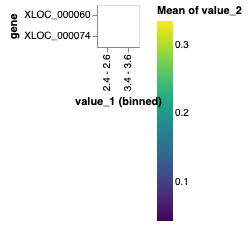

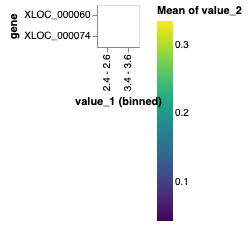

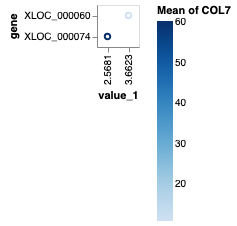

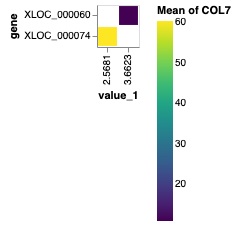

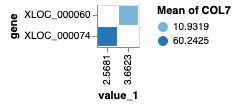

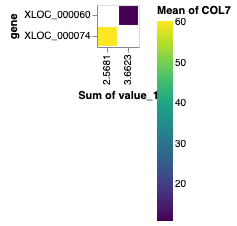

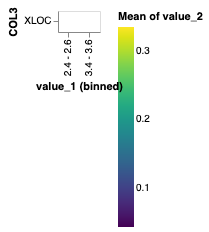

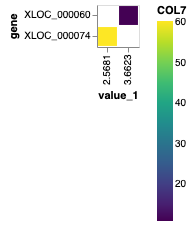

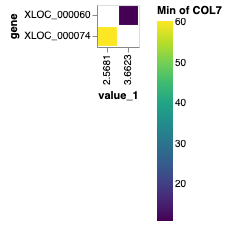

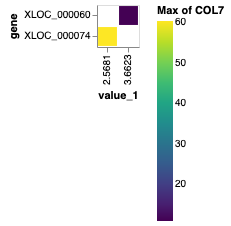

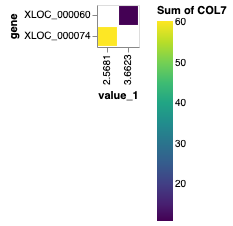

: 'sum',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_134.vl.json
__temp__/temp_134.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_135.vl.json
__temp__/temp_135.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_136.vl.json
__temp__/temp_136.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'point'}


temp_137.vl.json
__temp__/temp_137.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_138.vl.json
__temp__/temp_138.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'ordinal'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_139.vl.json
__temp__/temp_139.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_14.vl.json
__temp__/temp_14.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_140.vl.json
__temp__/temp_140.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_141.vl.json
__temp__/temp_141.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_142.vl.json
__temp__/temp_142.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_143.vl.json
__temp__/temp_143.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_144.vl.json
__temp__/temp_144.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_145.vl.json
__temp__/temp_145.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_146.vl.json
__temp__/temp_146.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'point'}


temp_147.vl.json
__temp__/temp_147.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_148.vl.json
__temp__/temp_148.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_149.vl.json
__temp__/temp_149.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_15.vl.json
__temp__/temp_15.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_150.vl.json
__temp__/temp_150.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_151.vl.json
__temp__/temp_151.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_152.vl.json
__temp__/temp_152.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_153.vl.json
__temp__/temp_153.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_154.vl.json
__temp__/temp_154.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_155.vl.json
__temp__/temp_155.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_156.vl.json
__temp__/temp_156.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_157.vl.json
__temp__/temp_157.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_158.vl.json
__temp__/temp_158.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'point'}


temp_159.vl.json
__temp__/temp_159.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'ordinal'}},
 'mark': 'rect'}


temp_16.vl.json
__temp__/temp_16.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_160.vl.json
__temp__/temp_160.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_161.vl.json
__temp__/temp_161.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_162.vl.json
__temp__/temp_162.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_163.vl.json
__temp__/temp_163.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_164.vl.json
__temp__/temp_164.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_165.vl.json
__temp__/temp_165.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_166.vl.json
__temp__/temp_166.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_167.vl.json
__temp__/temp_167.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_168.vl.json
__temp__/temp_168.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_169.vl.json
__temp__/temp_169.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'point'}


temp_17.vl.json
__temp__/temp_17.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_170.vl.json
__temp__/temp_170.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'ordinal'}},
 'mark': 'rect'}


temp_171.vl.json
__temp__/temp_171.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'nominal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_172.vl.json
__temp__/temp_172.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]}

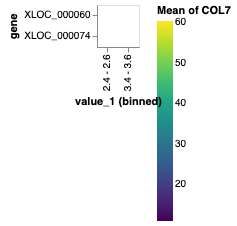

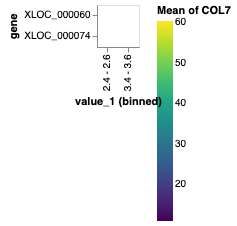

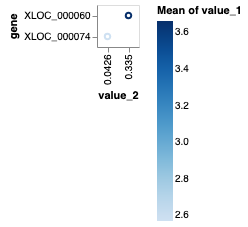

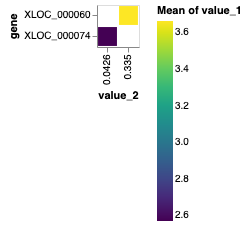

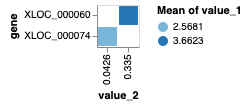

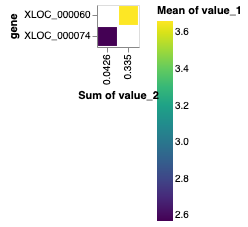

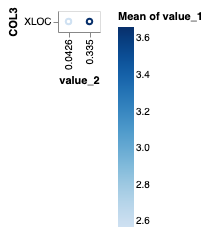

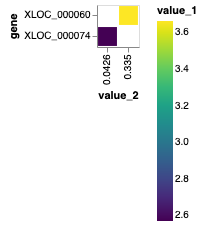

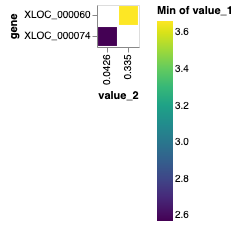

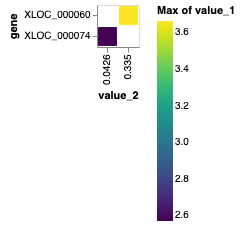

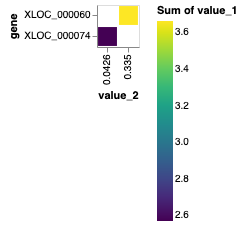

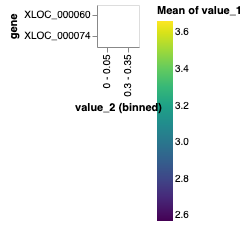

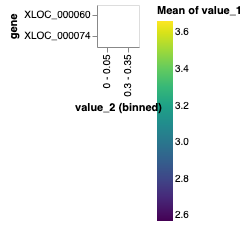

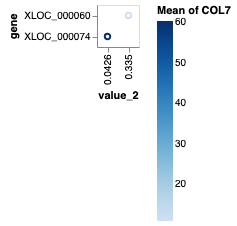

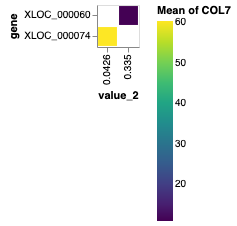

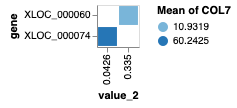

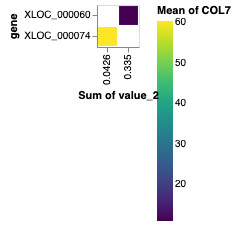

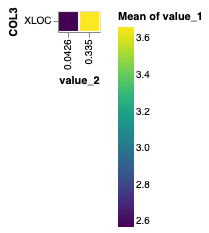

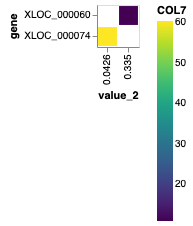

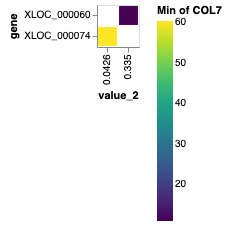

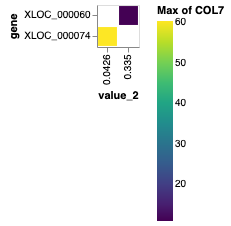

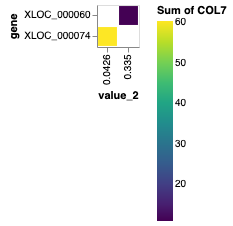

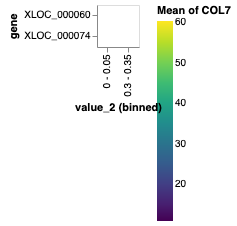

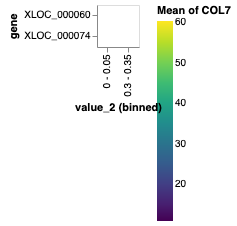

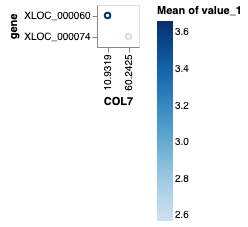

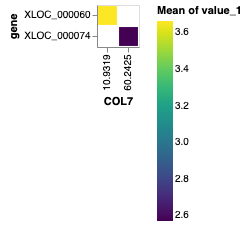

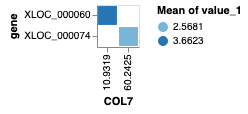

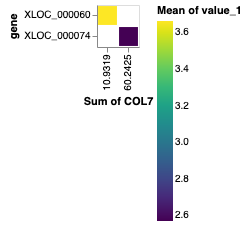

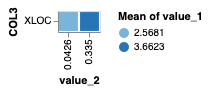

,
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_173.vl.json
__temp__/temp_173.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_174.vl.json
__temp__/temp_174.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_175.vl.json
__temp__/temp_175.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_176.vl.json
__temp__/temp_176.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_177.vl.json
__temp__/temp_177.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_178.vl.json
__temp__/temp_178.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_179.vl.json
__temp__/temp_179.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_18.vl.json
__temp__/temp_18.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_180.vl.json
__temp__/temp_180.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_181.vl.json
__temp__/temp_181.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_182.vl.json
__temp__/temp_182.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'point'}


temp_183.vl.json
__temp__/temp_183.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'ordinal'}},
 'mark': 'rect'}


temp_184.vl.json
__temp__/temp_184.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_185.vl.json
__temp__/temp_185.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'ordinal'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_186.vl.json
__temp__/temp_186.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_187.vl.json
__temp__/temp_187.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_188.vl.json
__temp__/temp_188.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_189.vl.json
__temp__/temp_189.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_19.vl.json
__temp__/temp_19.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_190.vl.json
__temp__/temp_190.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_191.vl.json
__temp__/temp_191.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_192.vl.json
__temp__/temp_192.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'COL7',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_193.vl.json
__temp__/temp_193.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'point'}


temp_194.vl.json
__temp__/temp_194.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'ordinal'}},
 'mark': 'rect'}


temp_195.vl.json
__temp__/temp_195.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_196.vl.json
__temp__/temp_196.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'ordinal'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_197.vl.json
__temp__/temp_197.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_198.vl.json
__temp__/temp_198.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_199.vl.json
__temp__/temp_199.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_2.vl.json
__temp__/temp_2.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'point'}


temp_20.vl.json
__temp__/temp_20.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_200.vl.json
__temp__/temp_200.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_201.vl.json
__temp__/temp_201.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_202.vl.json
__temp__/temp_202.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_203.vl.json
__temp__/temp_203.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'COL7', 'type': 'ordinal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_204.vl.json
__temp__/temp_204.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_205.vl.json
__temp__/temp_205.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_206.vl.json
__temp__/temp_206.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'point'}


temp_207.vl.json
__temp__/temp_207.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'ordinal'}},
 'mark': 'rect'}


temp_208.vl.json
__temp__/temp_208.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'nominal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_209.vl.json
__temp__/temp_209.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_21.vl.json
__temp__/temp_21.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_210.vl.json
__temp__/temp_210.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_211.vl.json
__temp__/temp_211.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_212.vl.json
__temp__/temp_212.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_213.vl.json
__temp__/temp_213.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_214.vl.json
__temp__/temp_214.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_215.vl.json
__temp__/temp_215.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_216.vl.json
__temp__/temp_216.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_217.vl.json
__temp__/temp_217.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'point'}


temp_218.vl.json
__temp__/temp_218.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'ordinal'}},
 'mark': 'rect'}


temp_219.vl.json
__temp__/temp_219.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_22.vl.json
__temp__/temp_22.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL3', 'type': 'nominal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_220.vl.json
__temp__/temp_220.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_221.vl.json
__temp__/temp_221.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_222.vl.json
__temp__/temp_222.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_223.vl.json
__temp__/temp_223.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_224.vl.json
__temp__/temp_224.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_225.vl.json
__temp__/temp_225.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_226.vl.json
__temp__/temp_226.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_227.vl.json
__temp__/temp_227.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL7', 'type': 'nominal'}},
 'mark': 'rect'}


temp_228.vl.json
__temp__/temp_228.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'point'}


temp_229.vl.json
__temp__/temp_229.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_23.vl.json
__temp__/temp_23.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL3', 'type': 'nominal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_230.vl.json
__temp__/temp_230.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_231.vl.json
__temp__/temp_231.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_232.vl.json
__temp__/temp_232.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_233.vl.json
__temp__/temp_233.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_234.vl.json
__temp__/temp_234.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_235.vl.json
__temp__/temp_235.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_236.vl.json
__temp__/temp_236.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_237.vl.json
__temp__/temp_237.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_238.vl.json
__temp__/temp_238.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'point'}


temp_239.vl.json
__temp__/temp_239.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_24.vl.json
__temp__/temp_24.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'point'}


temp_240.vl.json
__temp__/temp_240.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_241.vl.json
__temp__/temp_241.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_242.vl.json
__temp__/temp_242.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_243.vl.json
__temp__/temp_243.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_244.vl.json
__temp__/temp_244.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_245.vl.json
__temp__/temp_245.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_246.vl.json
__temp__/temp_246.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_247.vl.json
__temp__/temp_247.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_248.vl.json
__temp__/temp_248.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_249.vl.json
__temp__/temp_249.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_25.vl.json
__temp__/temp_25.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'nominal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_250.vl.json
__temp__/temp_250.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_251.vl.json
__temp__/temp_251.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'aggregate': 'mean', 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_252.vl.json
__temp__/temp_252.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_253.vl.json
__temp__/temp_253.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_254.vl.json
__temp__/temp_254.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_255.vl.json
__temp__/temp_255.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_256.vl.json
__temp__/temp_256.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_257.vl.json
__temp__/temp_257.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_258.vl.json
__temp__/temp_258.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_259.vl.json
__temp__/temp_259.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'point'}


temp_26.vl.json
__temp__/temp_26.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_260.vl.json
__temp__/temp_260.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_261.vl.json
__temp__/temp_261.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_262.vl.json
__temp__/temp_262.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'aggregate': 'mean', 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_263.vl.json
__temp__/temp_263.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_264.vl.json
__temp__/temp_264.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_265.vl.json
__temp__/temp_265.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_266.vl.json
__temp__/temp_266.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_267.vl.json
__temp__/temp_267.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_268.vl.json
__temp__/temp_268.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_269.vl.json
__temp__/temp_269.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_27.vl.json
__temp__/temp_27.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_270.vl.json
__temp__/temp_270.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_271.vl.json
__temp__/temp_271.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_28.vl.json
__temp__/temp_28.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_29.vl.json
__temp__/temp_29.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_3.vl.json
__temp__/temp_3.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'nominal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_30.vl.json
__temp__/temp_30.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_31.vl.json
__temp__/temp_31.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_32.vl.json
__temp__/temp_32.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_33.vl.json
__temp__/temp_33.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_34.vl.json
__temp__/temp_34.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'point'}


temp_35.vl.json
__temp__/temp_35.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


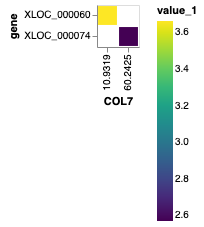

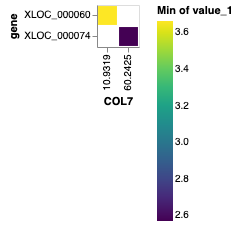

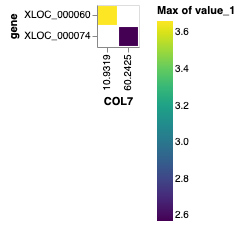

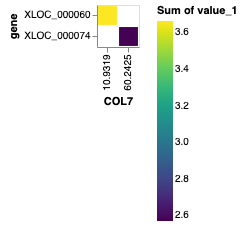

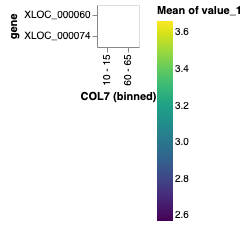

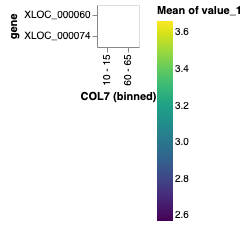

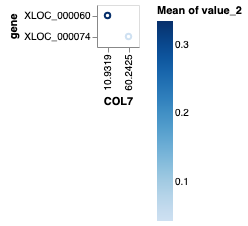

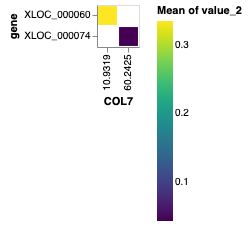

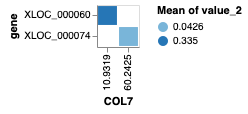

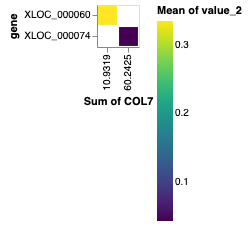

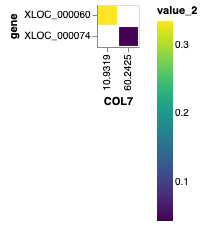

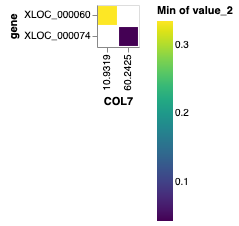

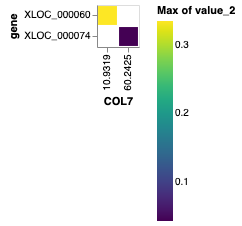

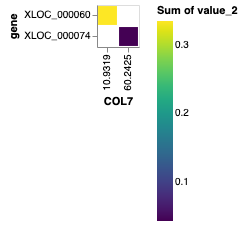

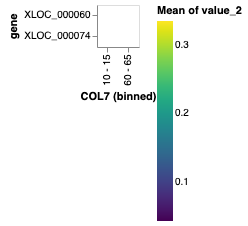

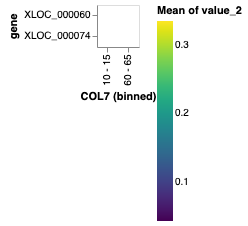

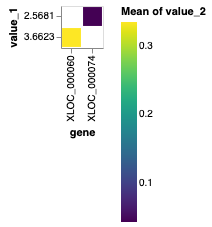

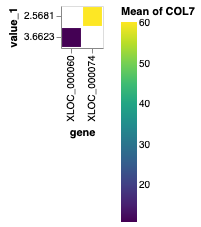

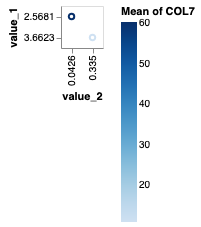

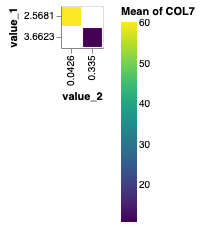

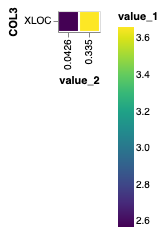

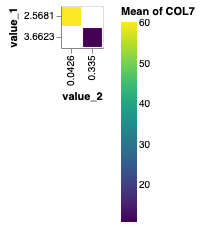

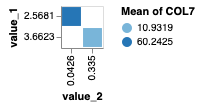

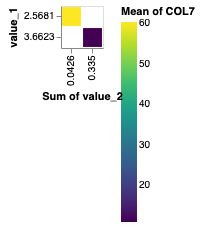

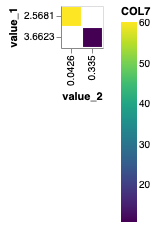

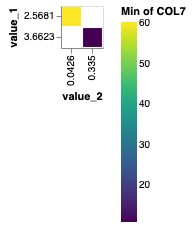

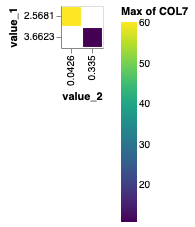

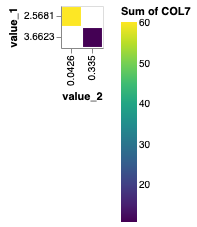

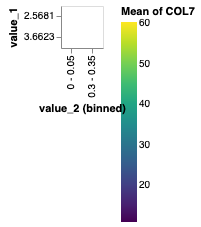

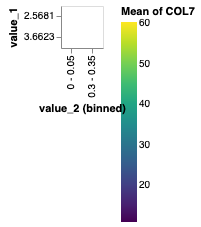

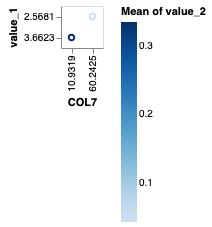

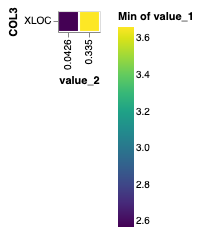

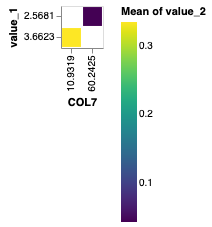

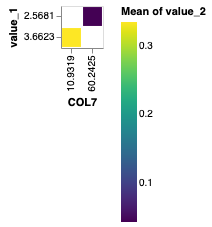

temp_36.vl.json
__temp__/temp_36.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_37.vl.json
__temp__/temp_37.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_38.vl.json
__temp__/temp_38.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_39.vl.json
__temp__/temp_39.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_4.vl.json
__temp__/temp_4.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_40.vl.json
__temp__/temp_40.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_41.vl.json
__temp__/temp_41.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_42.vl.json
__temp__/temp_42.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_43.vl.json
__temp__/temp_43.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'COL4', 'type': 'nominal'}},
 'mark': 'rect'}


temp_44.vl.json
__temp__/temp_44.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL3', 'type': 'nominal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_45.vl.json
__temp__/temp_45.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'COL4', 'type': 'nominal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_46.vl.json
__temp__/temp_46.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL3', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_47.vl.json
__temp__/temp_47.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'COL4', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_48.vl.json
__temp__/temp_48.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'point'}


temp_49.vl.json
__temp__/temp_49.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_5.vl.json
__temp__/temp_5.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_50.vl.json
__temp__/temp_50.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_51.vl.json
__temp__/temp_51.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_52.vl.json
__temp__/temp_52.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_53.vl.json
__temp__/temp_53.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_54.vl.json
__temp__/temp_54.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_55.vl.json
__temp__/temp_55.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_56.vl.json
__temp__/temp_56.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_57.vl.json
__temp__/temp_57.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_58.vl.json
__temp__/temp_58.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_59.vl.json
__temp__/temp_59.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_6.vl.json
__temp__/temp_6.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_60.vl.json
__temp__/temp_60.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'point'}


temp_61.vl.json
__temp__/temp_61.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_62.vl.json
__temp__/temp_62.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_63.vl.json
__temp__/temp_63.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_64.vl.json
__temp__/temp_64.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_65.vl.json
__temp__/temp_65.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_66.vl.json
__temp__/temp_66.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_67.vl.json
__temp__/temp_67.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_68.vl.json
__temp__/temp_68.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_69.vl.json
__temp__/temp_69.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_7.vl.json
__temp__/temp_7.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_70.vl.json
__temp__/temp_70.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_71.vl.json
__temp__/temp_71.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_72.vl.json
__temp__/temp_72.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_73.vl.json
__temp__/temp_73.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_74.vl.json
__temp__/temp_74.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'point'}


temp_75.vl.json
__temp__/temp_75.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_76.vl.json
__temp__/temp_76.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_77.vl.json
__temp__/temp_77.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_78.vl.json
__temp__/temp_78.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_79.vl.json
__temp__/temp_79.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_8.vl.json
__temp__/temp_8.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_80.vl.json
__temp__/temp_80.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_81.vl.json
__temp__/temp_81.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_82.vl.json
__temp__/temp_82.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_83.vl.json
__temp__/temp_83.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_84.vl.json
__temp__/temp_84.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'point'}


temp_85.vl.json
__temp__/temp_85.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_86.vl.json
__temp__/temp_86.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_87.vl.json
__temp__/temp_87.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_88.vl.json
__temp__/temp_88.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_89.vl.json
__temp__/temp_89.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'min',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_9.vl.json
__temp__/temp_9.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL3': 'XLOC',
                      'COL4': '000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL3': 'XLOC',
                      'COL4': '000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'COL3', 'type': 'nominal'}},
 'mark': 'rect'}


temp_90.vl.json
__temp__/temp_90.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'max',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_91.vl.json
__temp__/temp_91.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'sum',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_92.vl.json
__temp__/temp_92.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 10, 'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_93.vl.json
__temp__/temp_93.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'bin': 25, 'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_94.vl.json
__temp__/temp_94.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_95.vl.json
__temp__/temp_95.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'VALUE': 3.6623,
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_96.vl.json
__temp__/temp_96.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'point'}


temp_97.vl.json
__temp__/temp_97.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_98.vl.json
__temp__/temp_98.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_99.vl.json
__temp__/temp_99.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'COL7': 10.9319,
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'COL7': 60.2425,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'aggregate': 'sum', 'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


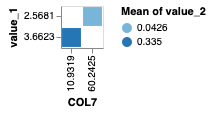

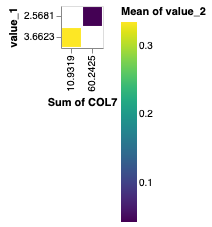

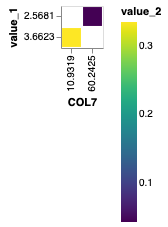

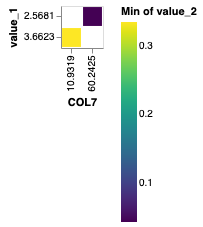

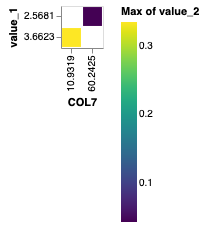

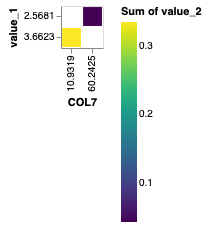

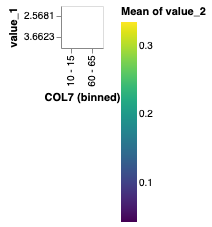

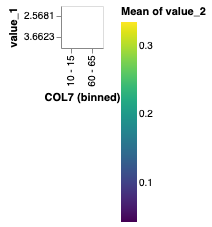

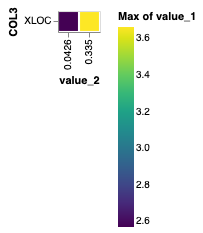

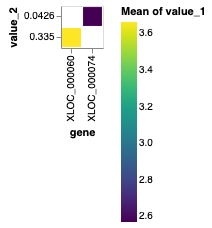

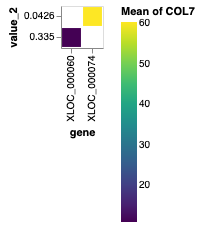

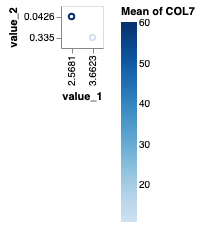

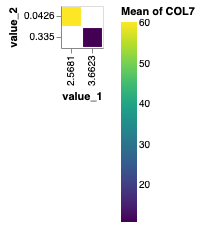

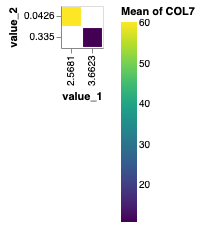

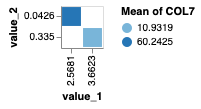

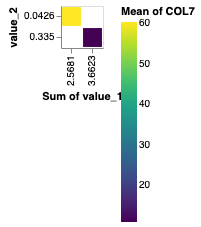

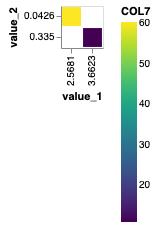

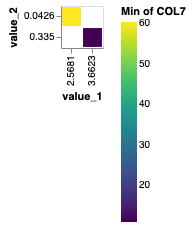

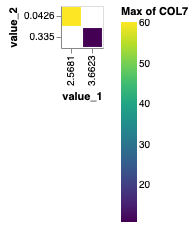

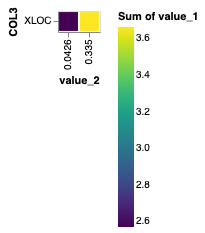

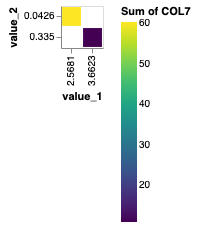

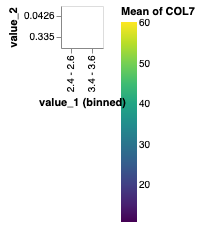

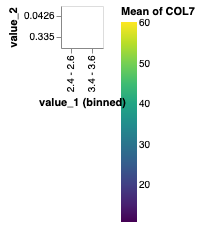

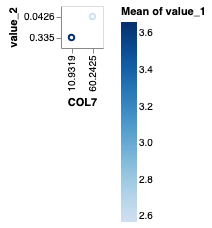

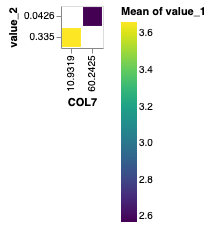

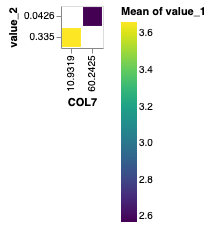

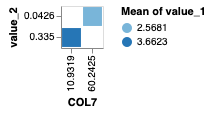

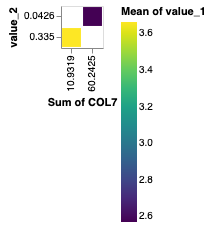

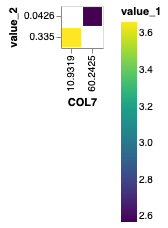

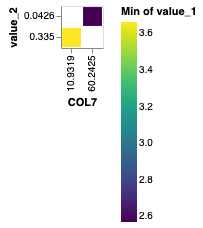

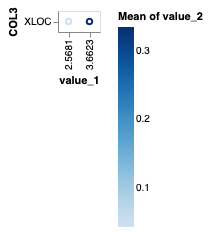

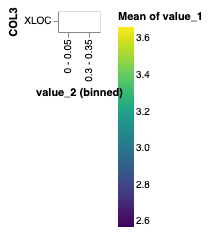

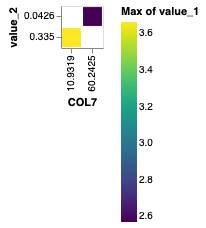

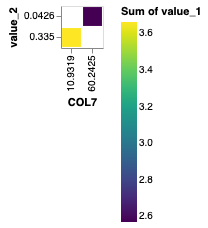

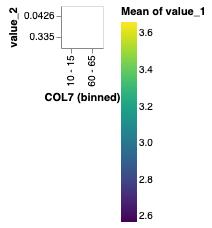

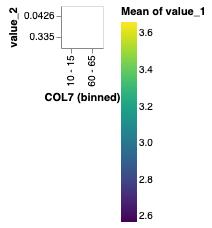

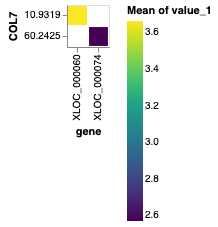

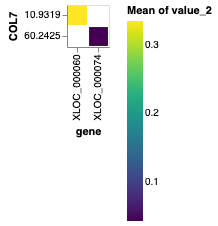

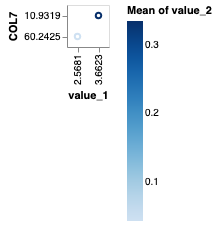

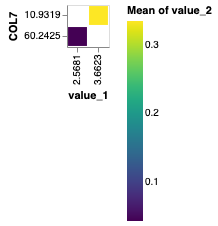

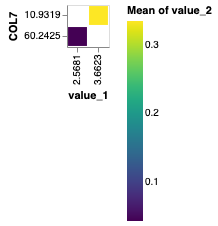

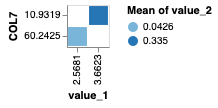

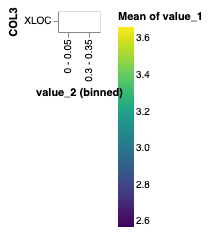

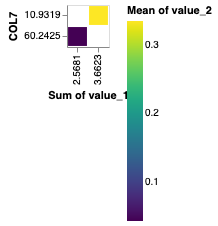

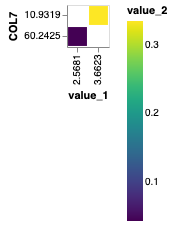

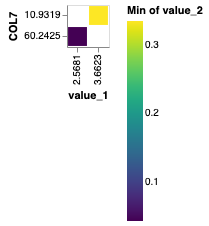

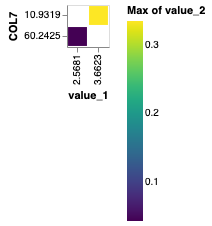

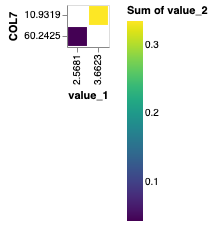

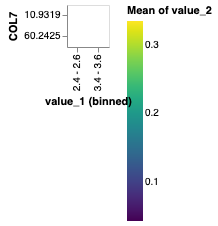

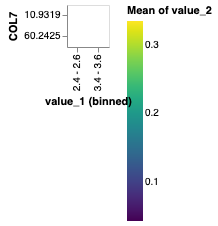

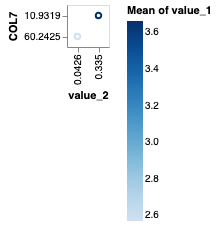

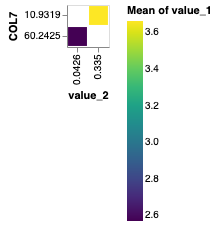

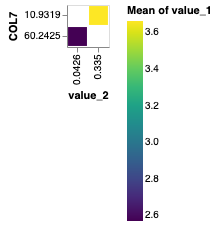

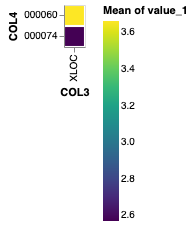

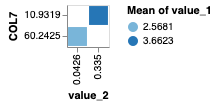

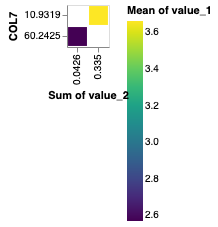

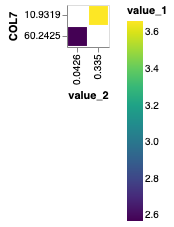

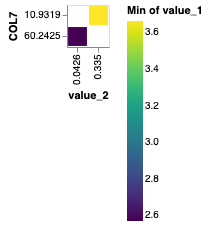

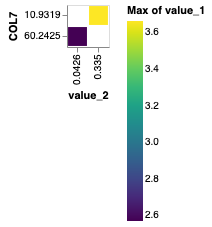

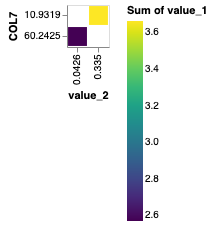

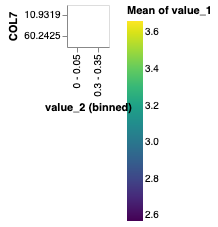

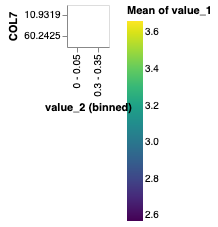

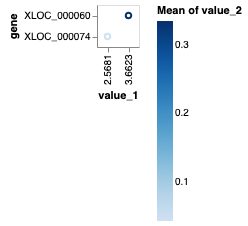

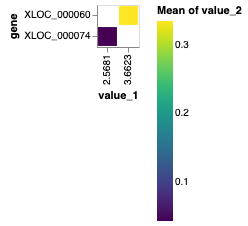

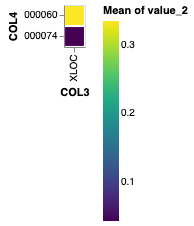

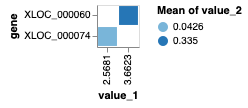

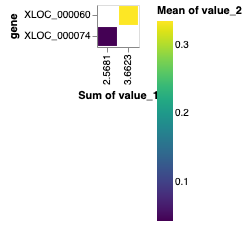

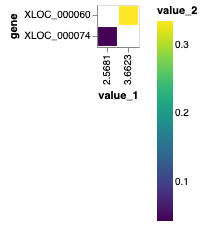

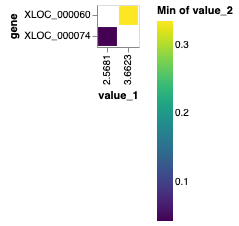

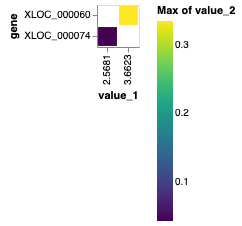

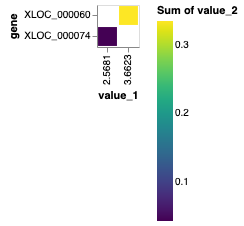

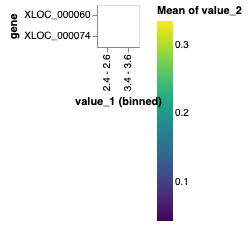

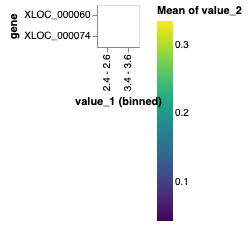

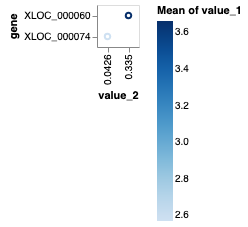

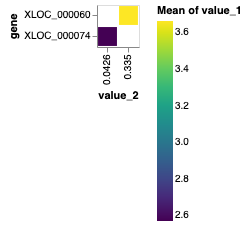

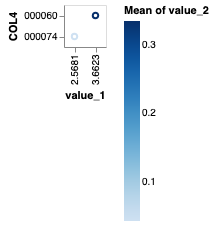

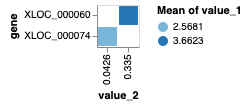

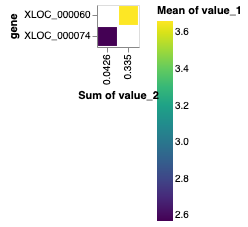

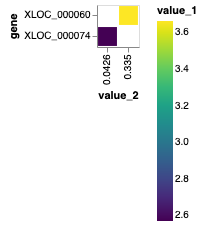

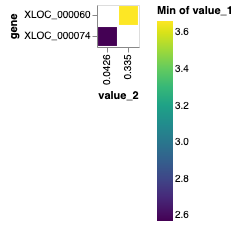

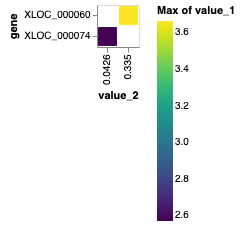

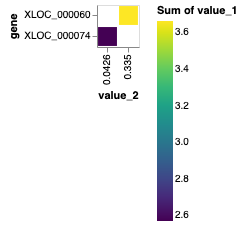

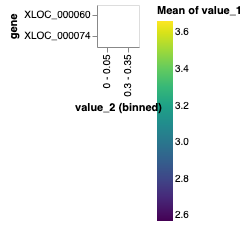

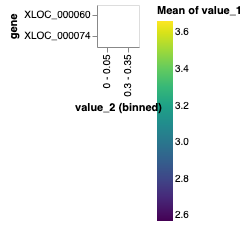

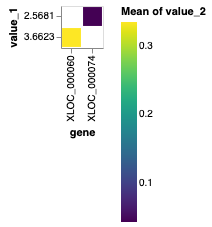

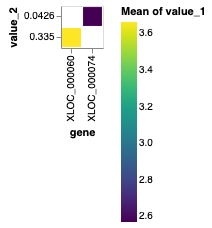

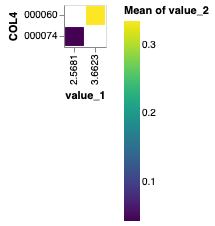

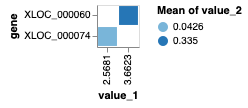

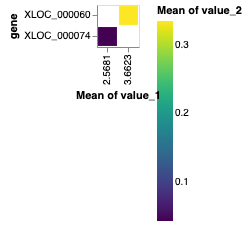

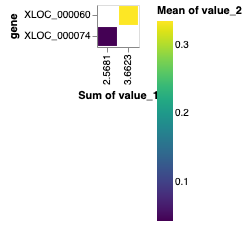

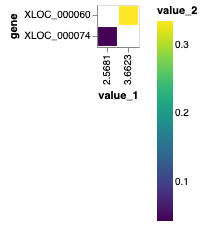

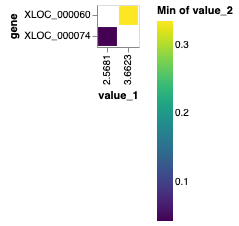

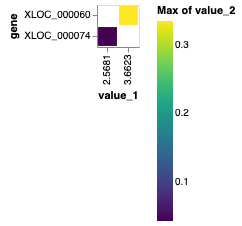

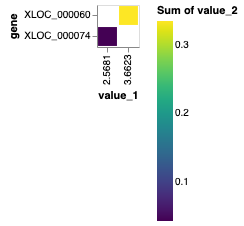

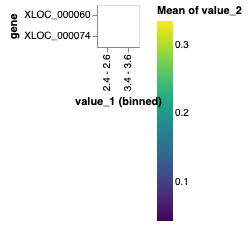

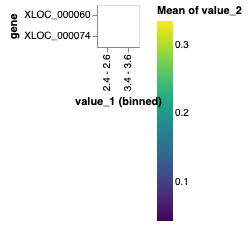

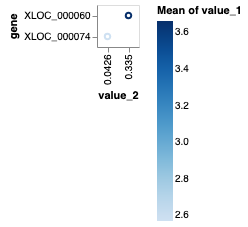

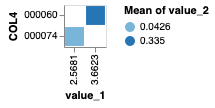

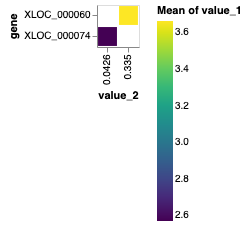

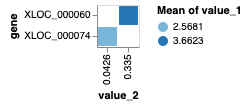

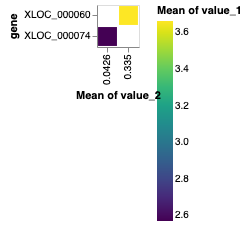

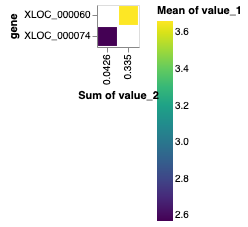

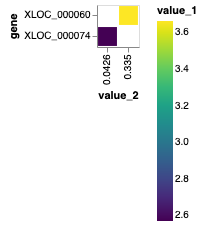

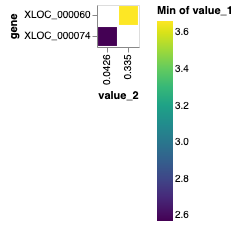

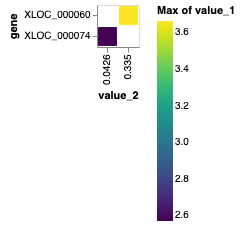

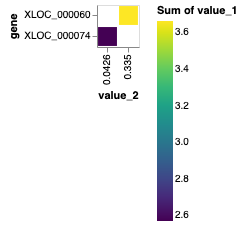

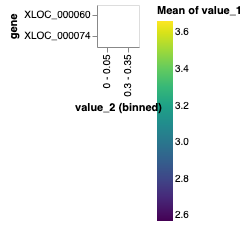

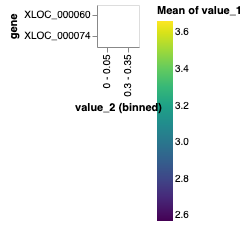

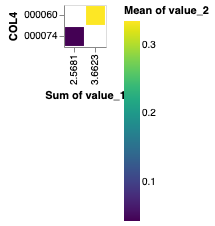

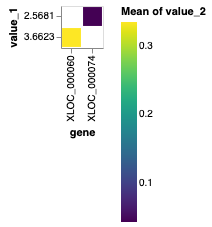

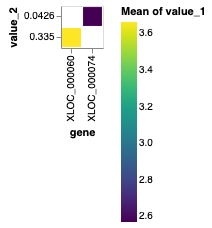

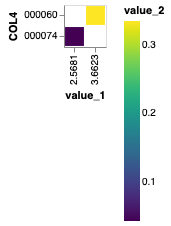

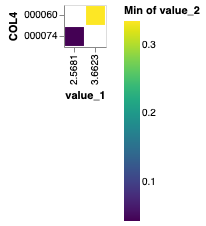

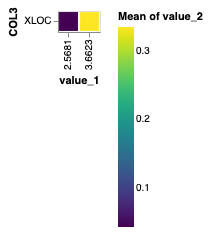

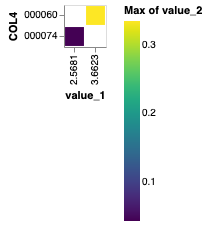

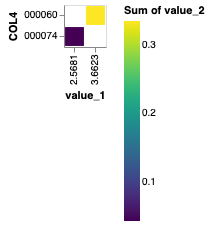

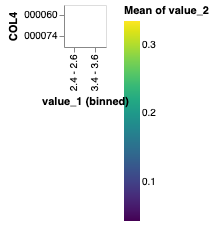

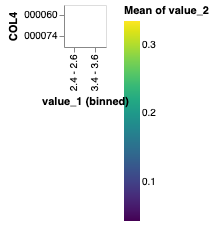

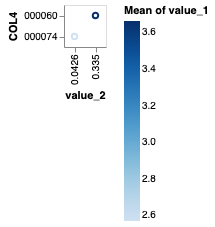

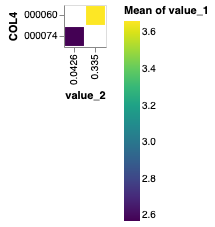

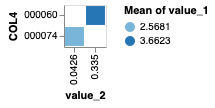

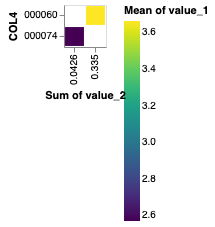

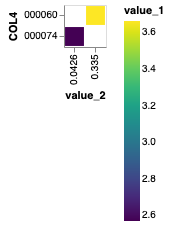

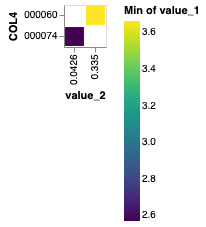

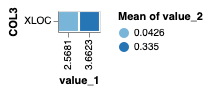

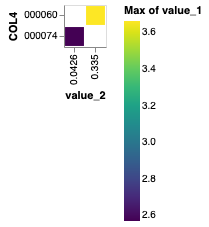

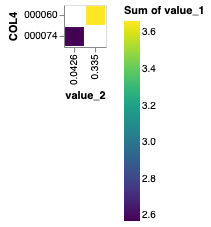

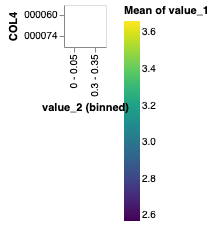

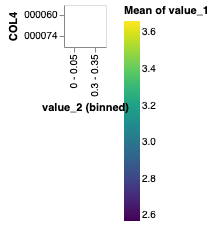

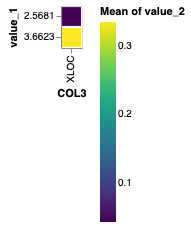

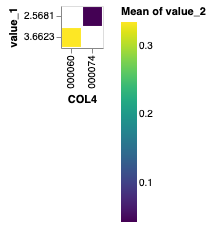

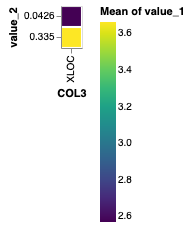

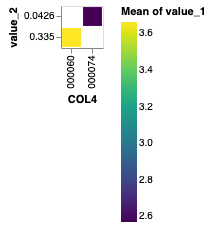

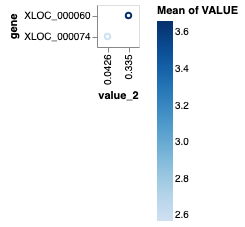

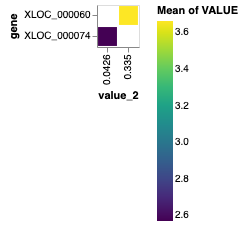

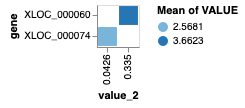

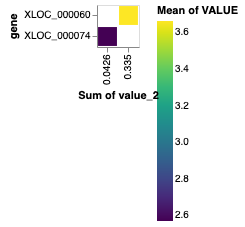

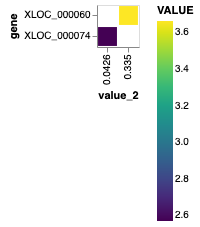

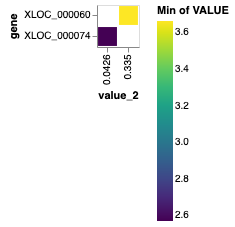

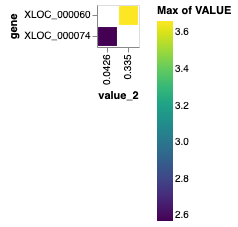

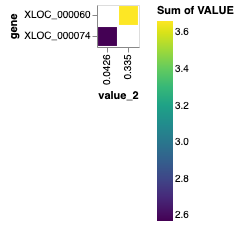

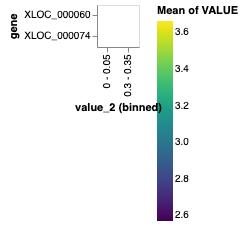

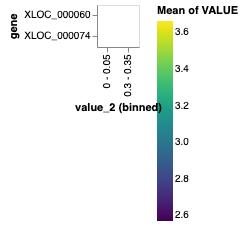

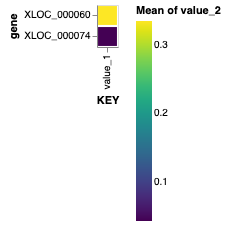

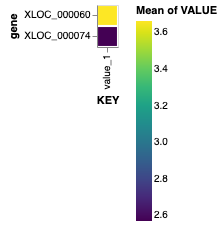

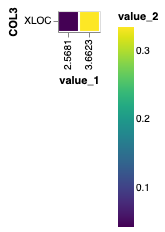

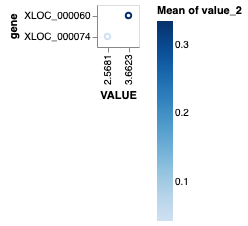

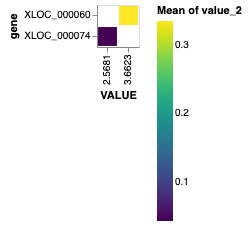

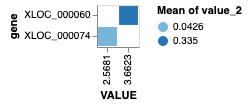

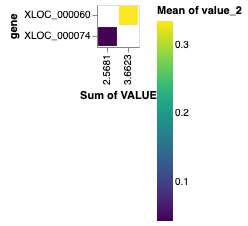

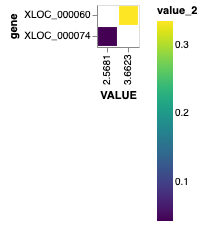

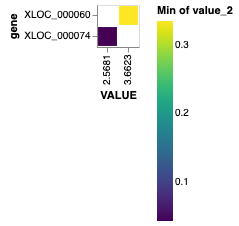

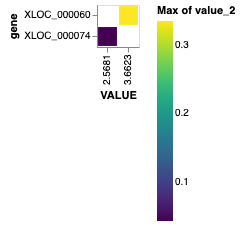

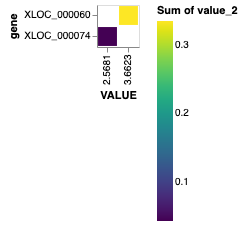

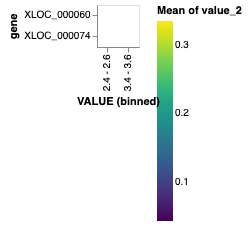

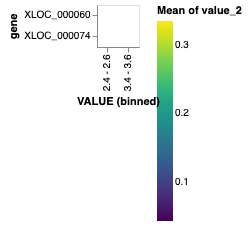

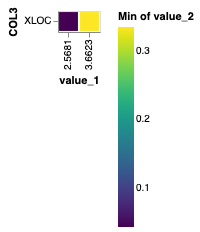

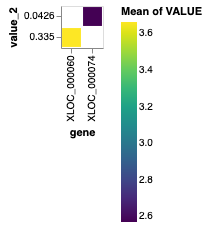

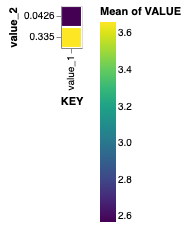

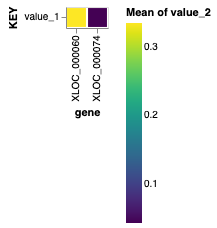

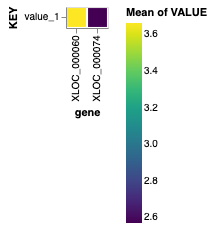

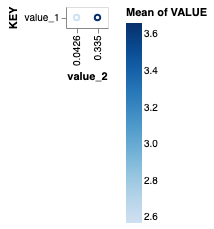

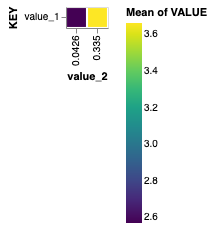

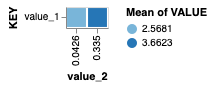

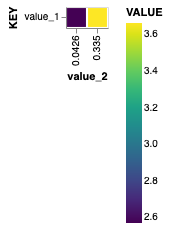

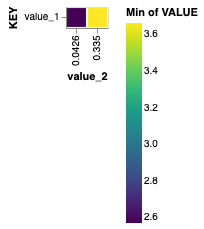

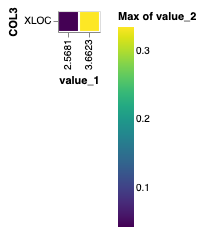

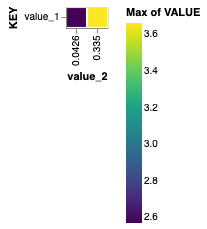

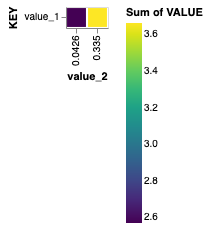

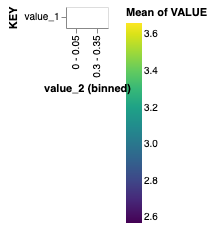

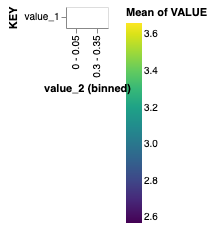

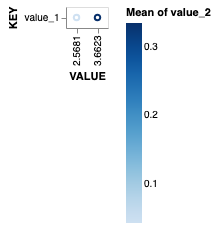

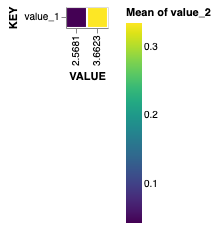

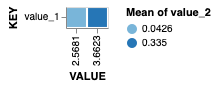

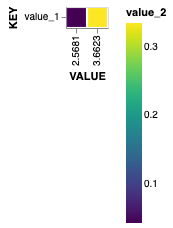

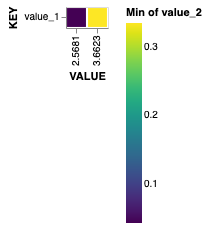

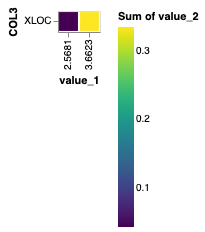

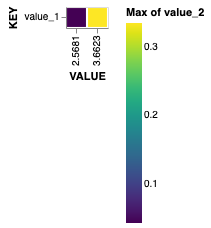

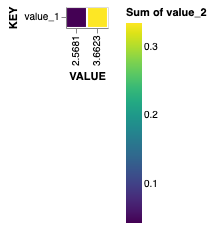

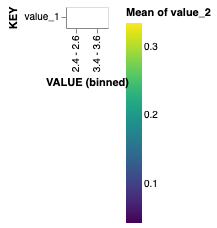

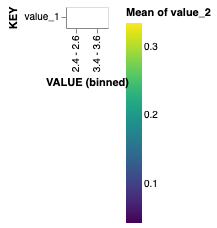

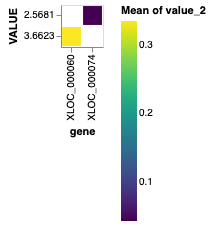

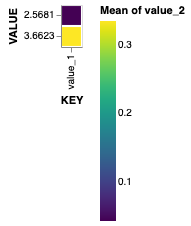

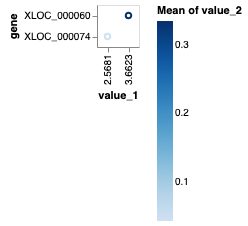

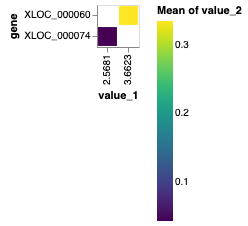

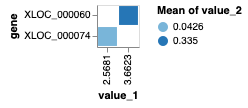

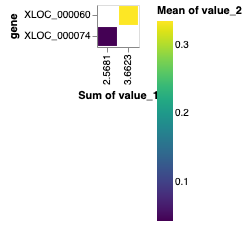

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import json
import os
from pprint import pprint 

from vega import VegaLite

def prepare_spec(input_file):
    print(input_file)
    with open(input_file) as f:
        spec_dir = os.path.dirname(input_file)
        spec = json.load(f)
        pprint(spec)
        # add data directory to the spec to fix relative import
        if "url" in spec["data"]:
            spec["data"]["url"] = os.path.join(spec_dir, spec["data"]["url"])
            print(spec["data"]["url"])
        return VegaLite(spec)

# render all charts in the dir
def render_vegalite_dir(input_dir, max_display=10):
    for i, fname in enumerate(sorted(os.listdir(input_dir))):
        if fname.endswith(".vl.json"):
            print(fname)
            vl = prepare_spec(os.path.join(input_dir, fname))
            vl.display()
    
# the input_file is relative to the notebook
#interact(render_vegalite_dir, input_dir="__temp__");

render_vegalite_dir("__temp__")